In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
study_data = pd.read_csv("studyflow_dummy_dataset.csv")

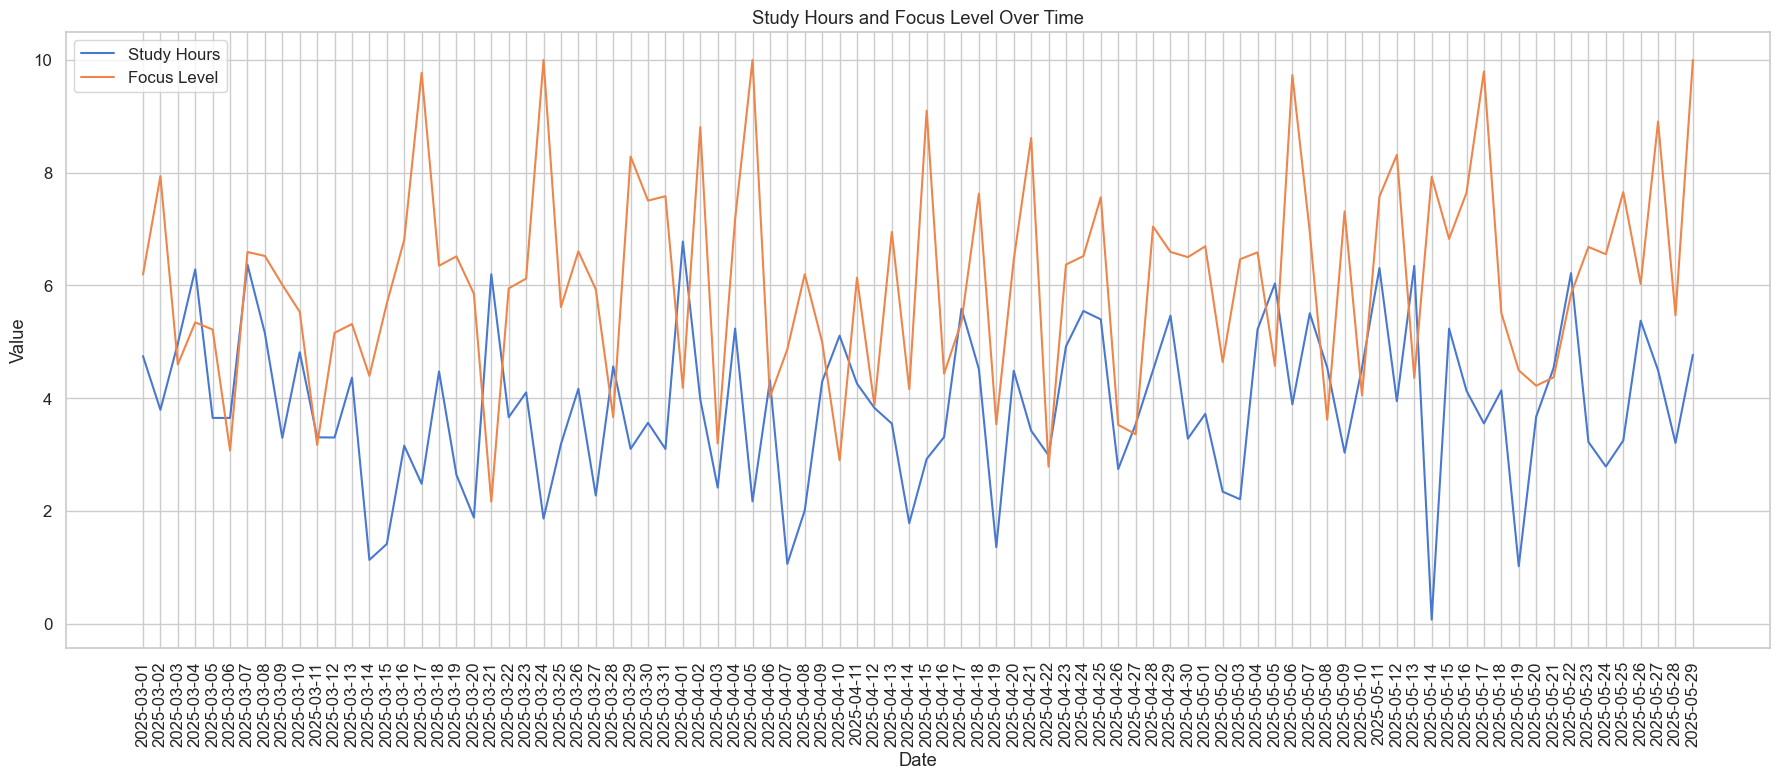

In [19]:
sns.set_theme(style="whitegrid", palette="muted", font_scale=1.1)
plt.figure(figsize=(18, 8))
sns.lineplot(x="date", y="study_hours", data=study_data, label="Study Hours")
sns.lineplot(x="date", y="focus_level", data=study_data, label="Focus Level")
plt.title("Study Hours and Focus Level Over Time")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

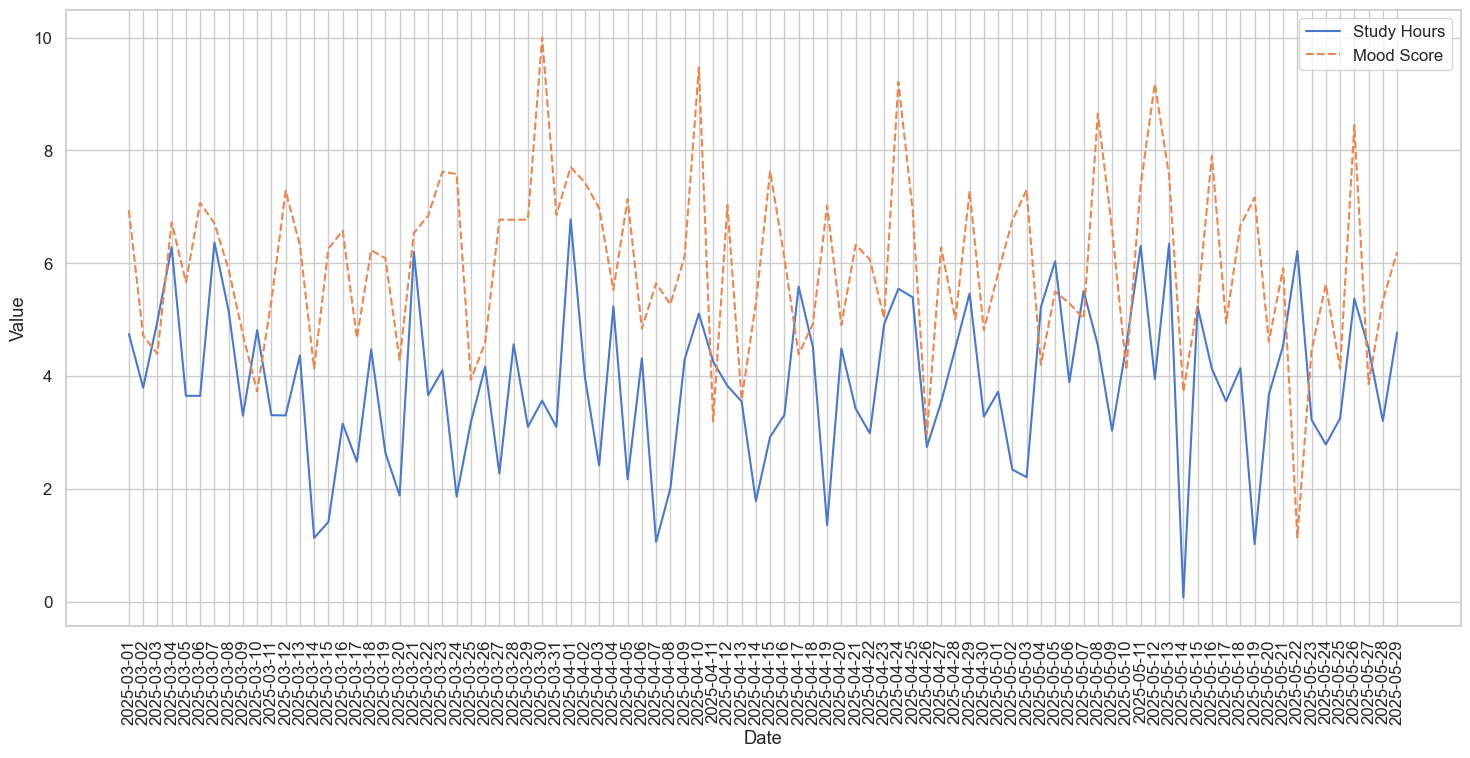

<Figure size 1800x800 with 0 Axes>

In [20]:
plt.figure(figsize=(18, 8))
sns.lineplot(x="date", y="study_hours", data=study_data, label="Study Hours")
sns.lineplot(x="date", y="mood_score", data=study_data, label="Mood Score", linestyle="--")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.xticks(rotation=90)
plt.figure(figsize=(18, 8))
plt.tight_layout()
plt.show()

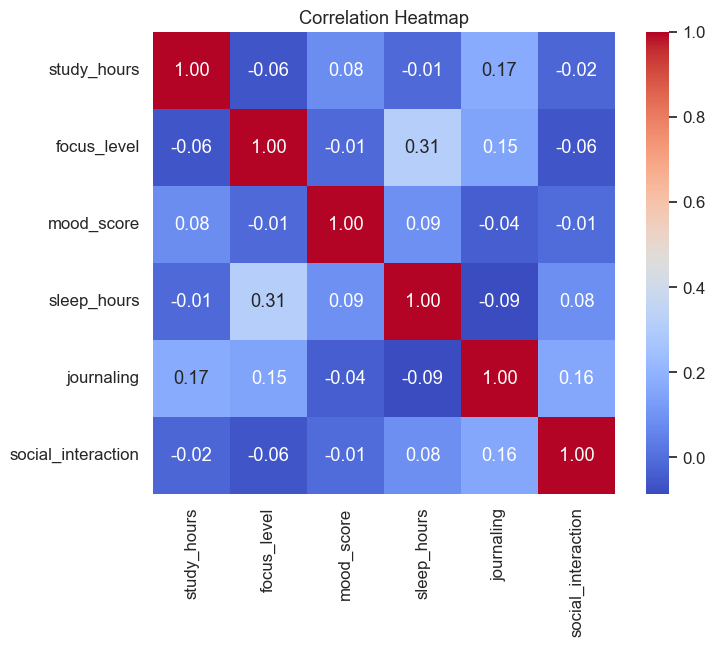

In [21]:
numeric_cols = ["study_hours", "focus_level", "mood_score", "sleep_hours", "journaling", "social_interaction"]
heatmap_data = study_data[numeric_cols]

corr = heatmap_data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Correlation Heatmap")
plt.show()

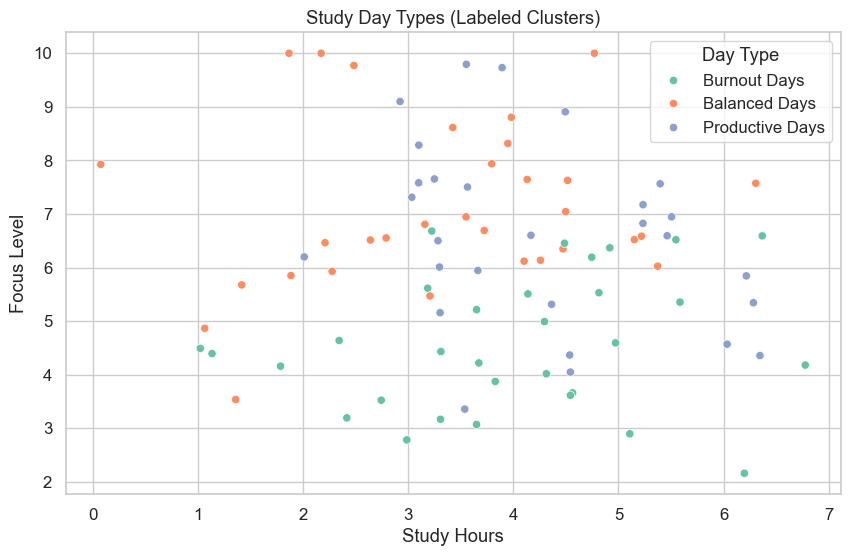

In [23]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select features for clustering
features = ["study_hours", "focus_level", "mood_score", "sleep_hours", "journaling", "social_interaction"]
X = study_data[features]

# Scale the data (important for clustering)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Cluster labels
cluster_labels = {
    0: "Burnout Days",
    1: "Productive Days",
    2: "Balanced Days"
}

# Cluster into 3 types of days
kmeans = KMeans(n_clusters=3, random_state=42)
study_data["study_day_type"] = kmeans.fit_predict(X_scaled)
study_data["cluster_label"] = study_data["study_day_type"].map(cluster_labels)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=study_data,
    x="study_hours",
    y="focus_level",
    hue="cluster_label",
    palette="Set2"
)
plt.title("Study Day Types (Labeled Clusters)")
plt.xlabel("Study Hours")
plt.ylabel("Focus Level")
plt.legend(title="Day Type")
plt.show()

In [69]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# -- Step 1: Define original bins (light imbalance)
def label_focus(val):
    if val < 4:
        return "Low"
    elif val < 7:
        return "Medium"
    else:
        return "High"

study_data["focus_bin"] = study_data["focus_level"].apply(label_focus)

# -- Step 2: Create interaction term
study_data["study_sleep_interaction"] = study_data["study_hours"] * study_data["sleep_hours"]

# -- Step 3: Define top predictive features
features = [
    "sleep_hours", "mood_score", "study_hours",
    "journaling", "study_sleep_interaction"
]

X = study_data[features]
y = study_data["focus_bin"]

# -- Step 4: Train & cross-validate Random Forest
clf = RandomForestClassifier(random_state=42)
scores = cross_val_score(clf, X, y, cv=5, scoring="accuracy")

# -- Step 5: Output results
print("Cross-validated accuracy scores:", scores)
print("Mean accuracy:", scores.mean())

Cross-validated accuracy scores: [0.61111111 0.5        0.72222222 0.72222222 0.55555556]
Mean accuracy: 0.6222222222222223


In [68]:

print(study_data["focus_bin"].value_counts())

focus_bin
High      31
Low       30
Medium    29
Name: count, dtype: int64
